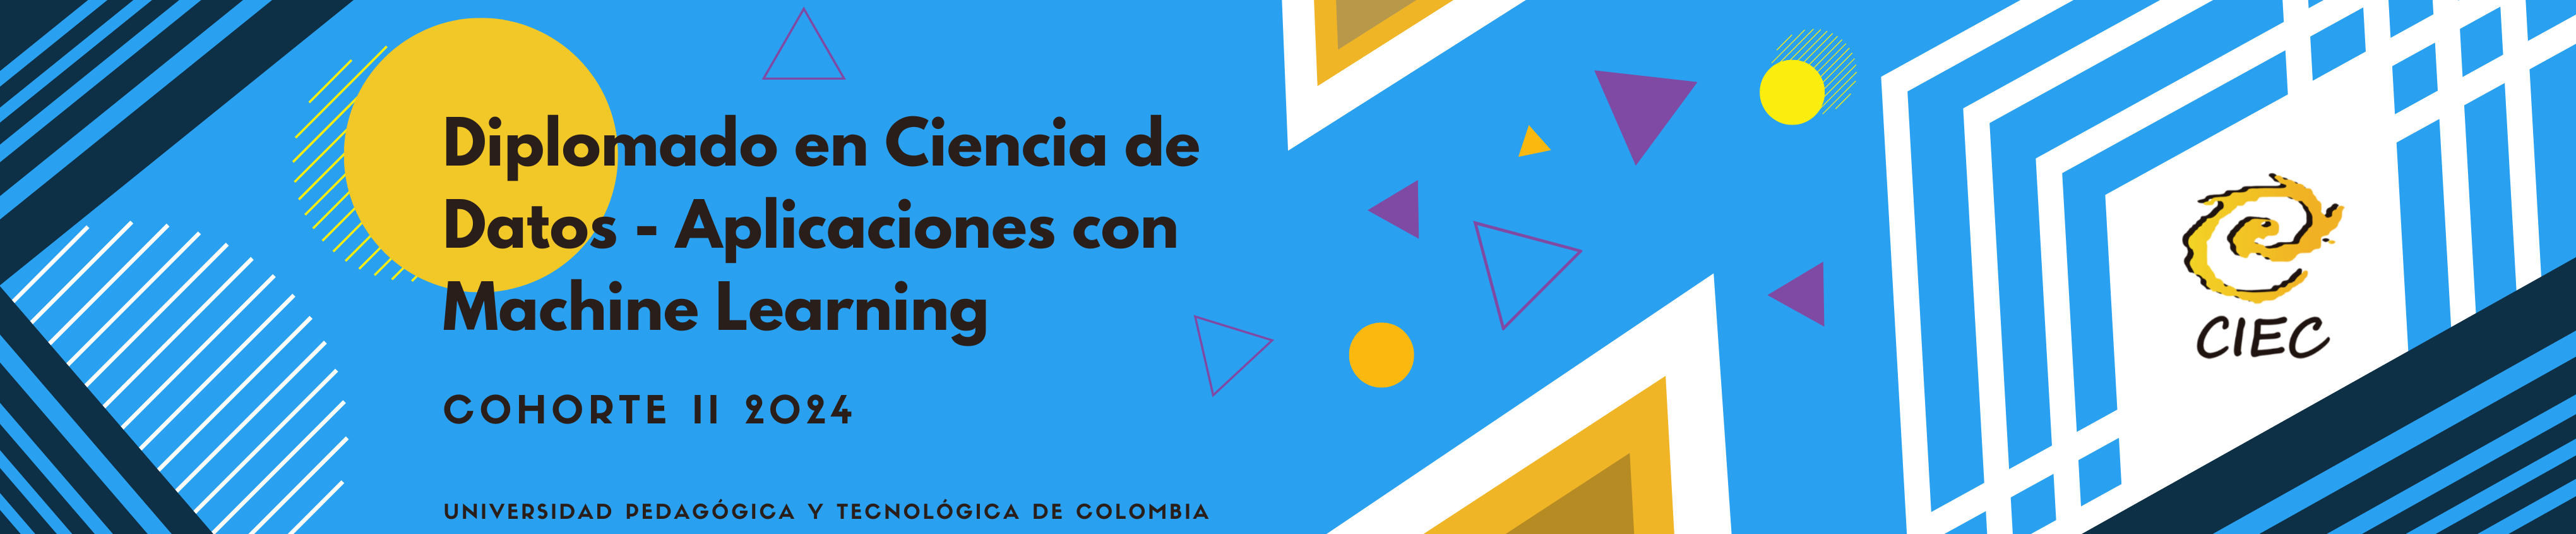

<!-- Main Title -->

**<h1 style="color: #FECB05; text-align: center;"> Regresión Lineal II: Ejercicios Prácticos de Regresión Lineal </h1>**

---

**<h2 style="color: #007ACC;">Autores</h2>**

- [Andrés Felipe Flórez Olivera](https://www.linkedin.com/in/felipeflorezo/)

---

Los datos de la vivienda de California (California Housing) corresponden a unos. datos de juguete sobre algunas viviendas en un vecindario de California. Este conjunto de datos se utiliza bastante para practicar sobre modelos de aprendizaje supervisado y estadística espacial. Aquí el ejercicio principal consiste en ser capaz de predecir o explicar el valor de la vivienda.

In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

In [2]:
housing = fetch_california_housing()
housing_df = pd.DataFrame(data=housing.data, columns=housing.feature_names)

housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [4]:
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [5]:
housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [6]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

<Axes: >

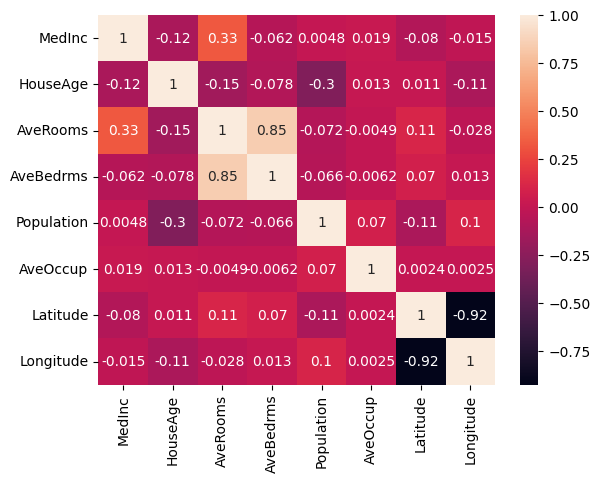

In [7]:
import seaborn as sns

corr_matrix  = housing_df.corr()

sns.heatmap(corr_matrix, annot=True)

<Axes: >

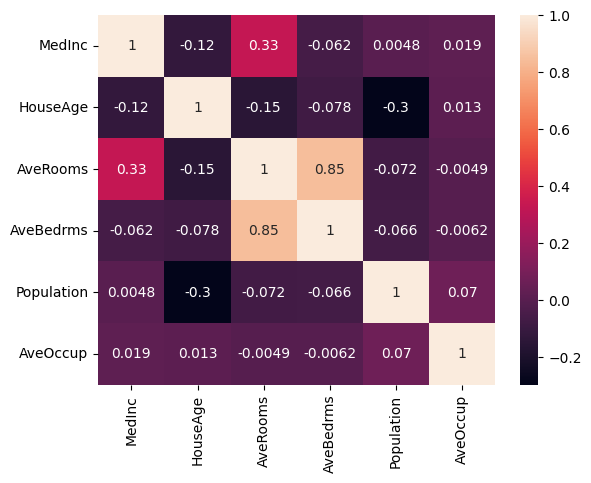

In [8]:
housing_df_drop = housing_df.drop(["Latitude", "Longitude"], axis=1)

corr_matrix_drop  = housing_df_drop.corr()

sns.heatmap(corr_matrix_drop, annot=True)

In [9]:
# librerias
# datos
# eda
# ajuste de dimensionalidad, escalador
# train test split
# modelo
# evaluacion
# retroalimentacion
# despliegue
# A/B Testing

En algunos ejercicios de aprendizaje supervisado, resulta una buena idea reescalar las variables que van a entrar como insumo al modelo. En particular, existen dos maneras bastante utilizadas para hacer esto:

- Reescalador MinMax:

$$MinMax(\mathbf{x}) = \left[\frac{\mathbf{x} - min(\mathbf{x})}{max(\mathbf{x}) - min(\mathbf{x})} \right]$$

- Reescalador estandarizado:

$$Standard(\mathbf{x}) = \frac{\mathbf{x} - \bar{x}}{s_{x}}$$

donde $\mathbf{\bar{x}}$ y $s_{x}$ son la media y la desviación estandar muestral de $\mathbf{x}$.

Este ejercicio se hace típicamente porque los algoritmos de optimización que utilizan los computadores a veces convergen más rápido cuándo todas las variables se encuentran en una escala en común.

El por qué se utiliza un reescalador u otro depende de la naturaleza de los datos, las características de la máquina de aprendizaje que va a utilizarse y el problema en cuestión.

Para el ejercicio de a continuación, utilizaremos la función `MinMaxScaler()` de `Sklearn`. Para aprender más sobre las herramientas de preprocesamiento disponibles en esta librería, puede visitar https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(housing_df_drop,
                                                    housing.target,
                                                    test_size=0.1,
                                                    random_state=15)

In [11]:
X_train.shape

(18576, 6)

In [12]:
y_train.shape

(18576,)

In [13]:
X_test.shape

(2064, 6)

In [14]:
y_test.shape

(2064,)

In [15]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pd.DataFrame(X_train_scaled).describe()

,0,1,2,3,4,5
count,18576.000000,18576.000000,18576.000000,18576.000000,18576.000000,18576.000000
mean,0.232252,0.543067,0.032489,0.022646,0.039774,0.001923
std,0.131410,0.247098,0.017805,0.014251,0.031506,0.008794
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.141989,0.333333,0.025465,0.019938,0.021862,0.001398
50%,0.208921,0.549020,0.031056,0.021210,0.032512,0.001710
75%,0.292444,0.705882,0.036882,0.022718,0.048348,0.002088
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train_scaled, y_train)

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred_train = reg.predict(X_train_scaled)

In [18]:
y_pred = reg.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(mse)
print(mae)

0.6166926764888351
0.5769722845610591


<h2> Diabetes </h2>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

from sklearn.datasets import load_diabetes

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV, train_test_split

In [ ]:
diabetes = load_diabetes(as_frame=True)

In [ ]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [ ]:
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [ ]:
X = diabetes_df.to_numpy()
y = diabetes.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(353, 10)
(89, 10)
(353,)
(89,)


<AxesSubplot: >

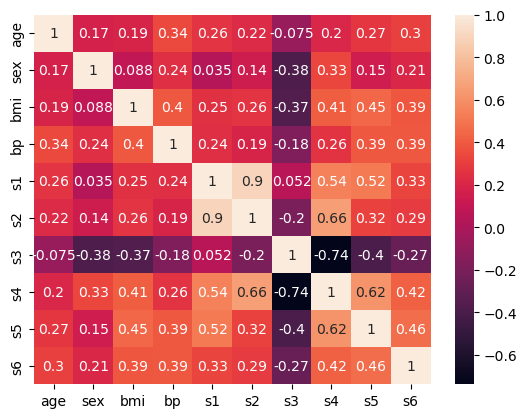

In [ ]:
corr_matrix  = diabetes_df.corr()

sns.heatmap(corr_matrix, annot=True)

In [ ]:
# Defining models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(random_state=42, max_iter=10000),
    "Ridge": Ridge(random_state=42)
}

In [ ]:
alphas = np.logspace(-4, -0.5, 30)
lasso_tuned_parameters = [{"alpha": alphas}]
ridge_tuned_parameters = [{"alpha": alphas}]

In [ ]:
lasso_clf = GridSearchCV(models["Lasso"], lasso_tuned_parameters, cv=5, refit=True)
ridge_clf = GridSearchCV(models["Ridge"], ridge_tuned_parameters, cv=5, refit=True)

In [ ]:
mae_results = {}

for name, clf in models.items():
    if name == "Lasso":
        clf = lasso_clf
    elif name == "Ridge":
        clf = ridge_clf

    clf.fit(X_train, y_train)

    if name != 'Linear Regression':
        best_estimator = clf.best_params_
        y_pred = clf.predict(X_test)

    else:
        y_pred = clf.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mae_results[name] = mae

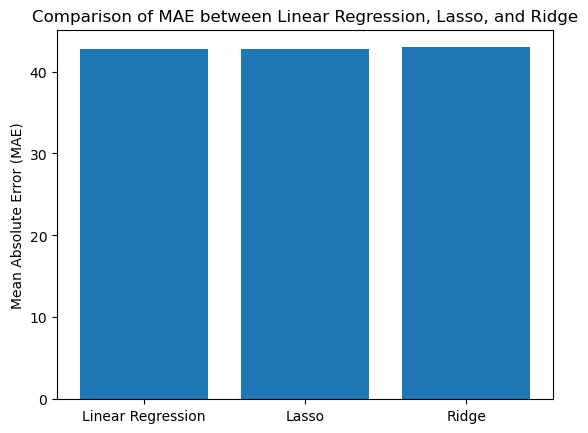

In [ ]:
# Plotting comparison
plt.bar(mae_results.keys(), mae_results.values())
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of MAE between Linear Regression, Lasso, and Ridge')
plt.show()

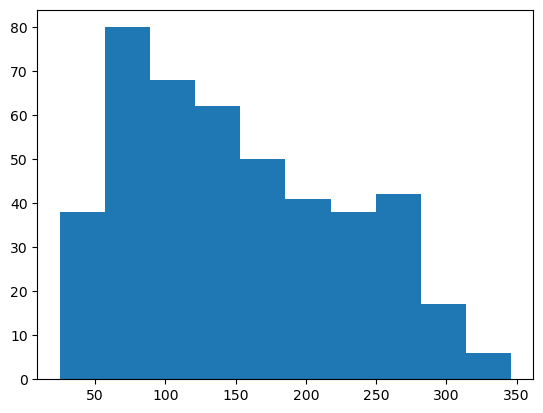

In [ ]:
plt.hist(y);

In [ ]:
pd.Series(y).describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: target, dtype: float64

In [ ]:
coefficients = lasso_clf.best_estimator_.coef_
feature_names = diabetes_df.columns

for name, estimation in zip(feature_names, coefficients):
    print(f'Importancia de {name}: {estimation}')

Importancia de age: 0.0
Importancia de sex: -167.69380753773868
Importancia de bmi: 554.091116421677
Importancia de bp: 311.3783645491102
Importancia de s1: -101.23959785895323
Importancia de s2: -0.0
Importancia de s3: -234.95850357466122
Importancia de s4: 0.0
Importancia de s5: 460.2005178930731
Importancia de s6: 36.70067195312105


<h2> Comparación entre modelos de regresión lineal </h2>

| Característica        | Regresión Lineal   | LASSO           | Regresión Ridge|
|-----------------------|--------------------|-----------------|-------------------|
| Objetivo              | Minimizar la suma de los residuos al cuadrado (RSS) | Minimizar el RSS con una penalización en el tamaño absoluto de los coeficientes | Minimizar el RSS con una penalización en el tamaño al cuadrado de los coeficientes |
| Término de Penalización | Ninguno            | \( \lambda \sum_{j=1}^{p} |\beta_j| \) | \( \lambda \sum_{j=1}^{p} \beta_j^2 \) |
| Efecto de Reducción   | Ninguno            | Reduce los coeficientes hacia cero, realizando efectivamente la selección de variables | Reduce los coeficientes hacia cero, pero conserva todas las variables |
| Selección de Variables | No                | Sí              | No                |
| Reducción de Coeficientes | No             | Sí              | Sí                |
| Estabilidad de la Solución | Sensible a la multicolinealidad y valores atípicos | Más robusto a la multicolinealidad y valores atípicos en comparación con Ridge, pero aún sensible | Más robusto a la multicolinealidad, pero menos robusto a valores atípicos en comparación con LASSO |
| Interpretabilidad     | Fácil de interpretar coeficientes | Algunos coeficientes pueden establecerse en cero, lo que conduce a un modelo más interpretable | Los coeficientes tienden a ser más pequeños, potencialmente más difíciles de interpretar |
| Complejidad Computacional | Baja            | Mayor que la Regresión Lineal debido al término de penalización adicional | Mayor que la Regresión Lineal debido al término de penalización adicional |
| Validación Cruzada    | Menos intensiva computacionalmente | Más intensiva computacionalmente debido a la selección de parámetros de ajuste | Más intensiva computacionalmente debido a la selección de parámetros de ajuste |
| Adecuado para         | Cuando no hay preocupaciones de multicolinealidad o sobreajuste | Cuando la selección de características es importante y hay multicolinealidad | Cuando la multicolinealidad es una preocupación, pero la selección de características no es necesaria |


# Un ejemplo adicional

In [ ]:
#Import libraries and functions:

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing setsx
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

**<h2 style="color: #007ACC;">Créditos</h2>**

---

**Docente:** Andrés Felipe Florez Olivera

**Universidad Pedagógica y Tecnológica de Colombia** - *Diplomado en Data Science: Aplicaciones con Machine Learning - Cohorte II - 2024*


---